In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dataset (Same as before — California Housing)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data[:, [0]]  # MedInc
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Initialize models
lin_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.01)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train all models
lin_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
poly_model.fit(X_train, y_train)

# Predict all
y_pred_lin = lin_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_poly = poly_model.predict(X_test)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate all models
models = {
    "Linear": y_pred_lin,
    "Ridge": y_pred_ridge,
    "Lasso": y_pred_lasso,
    "Polynomial": y_pred_poly
}

for name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"📌 {name} => MSE: {mse:.3f}, R²: {r2:.3f}")


📌 Linear => MSE: 0.709, R²: 0.459
📌 Ridge => MSE: 0.709, R²: 0.459
📌 Lasso => MSE: 0.709, R²: 0.459
📌 Polynomial => MSE: 0.703, R²: 0.463


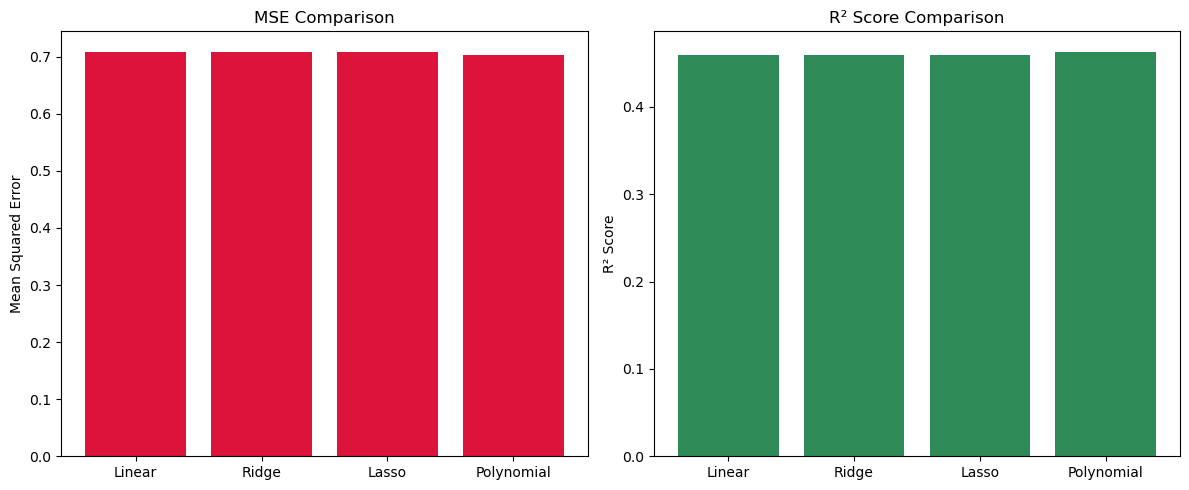

In [20]:
import matplotlib.pyplot as plt

# Data setup
model_names = ["Linear", "Ridge", "Lasso", "Polynomial"]
mse_scores = [
    mean_squared_error(y_test, y_pred_lin),
    mean_squared_error(y_test, y_pred_ridge),
    mean_squared_error(y_test, y_pred_lasso),
    mean_squared_error(y_test, y_pred_poly)
]

r2_scores = [
    r2_score(y_test, y_pred_lin),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_poly)
]

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].bar(model_names, mse_scores, color='crimson')
axs[0].set_title("MSE Comparison")
axs[0].set_ylabel("Mean Squared Error")

axs[1].bar(model_names, r2_scores, color='seagreen')
axs[1].set_title("R² Score Comparison")
axs[1].set_ylabel("R² Score")

plt.tight_layout()
plt.show()
